

# Tabular PlayGround walkthrough :
---

In this notebook we are going to see how to interpret a whole kaggle competition from one end to another.

We are following some steps which will be guided through other sub-operations / manipulations to gather knowledge and process and tune and find good accuracy. 

we are going to use custom Neural Networks using keras and tensorflow to predict.

In [46]:
!pip install -q kaggle

!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [47]:
!kaggle competitions download -c tabular-playground-series-may-2021

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [48]:
from zipfile import ZipFile
zf = ZipFile('/content/train.csv.zip', 'r')
zf.extractall('/content')
zf.close()
zf = ZipFile('/content/test.csv.zip', 'r')
zf.extractall('/content')
zf.close()
zf = ZipFile('/content/sample_submission.csv.zip', 'r')
zf.extractall('/content')
zf.close()

## Data Loading :
---
At first we have to gather the data pathas and load them into dataframes for further manipulations.

In [49]:
# Data Paths 

train_path = 'train.csv'

test_path = 'test.csv'

sample_submission_path = 'sample_submission.csv'

# Importing primary libraries 

# Data Manipulation
#-------------------------------
import os
import pandas as pd
import numpy as np

# Data Visualization
#--------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Train Data

train_data = pd.read_csv( train_path )

train_data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Class_2


In [51]:
# Test Data

test_data = pd.read_csv( test_path )

test_data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,0,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,7,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,4,0,2,0,0,2,0,3,6,3,0,0,6,0,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,4,4,0,0,0,0,0,3,0,0,0,0,0,2,11,0,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,4,1,0,0,1,0,0,1,1,1,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,0,0,1,0,0,9,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [52]:
# Sample submission Data 

samp_sub = pd.read_csv( sample_submission_path )

samp_sub.head()

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25
1,100001,0.25,0.25,0.25,0.25
2,100002,0.25,0.25,0.25,0.25
3,100003,0.25,0.25,0.25,0.25
4,100004,0.25,0.25,0.25,0.25


## Primary Visualization & Exploratory Data Analysis:
---

Now we are going to check the basic structure of the data and how we can manipulate in to present the trainable data.

In [53]:
# Overall train data structure

print(train_data.info())

train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          100000 non-null  int64 
 1   feature_0   100000 non-null  int64 
 2   feature_1   100000 non-null  int64 
 3   feature_2   100000 non-null  int64 
 4   feature_3   100000 non-null  int64 
 5   feature_4   100000 non-null  int64 
 6   feature_5   100000 non-null  int64 
 7   feature_6   100000 non-null  int64 
 8   feature_7   100000 non-null  int64 
 9   feature_8   100000 non-null  int64 
 10  feature_9   100000 non-null  int64 
 11  feature_10  100000 non-null  int64 
 12  feature_11  100000 non-null  int64 
 13  feature_12  100000 non-null  int64 
 14  feature_13  100000 non-null  int64 
 15  feature_14  100000 non-null  int64 
 16  feature_15  100000 non-null  int64 
 17  feature_16  100000 non-null  int64 
 18  feature_17  100000 non-null  int64 
 19  feature_18  100000 non-n

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000
mean,49999.500000,0.257830,0.431720,0.114130,0.590550,0.599770,0.160820,0.731490,1.228920,0.903350,0.940120,0.313680,0.403750,0.461470,0.07565,2.597320,1.242030,0.364830,0.740000,0.471220,1.564780,0.242890,0.661970,0.184740,0.388040,1.04013,0.408630,0.353550,0.300680,1.106060,0.169600,0.294500,1.372040,0.277510,0.612460,1.122150,0.908980,0.116530,0.398310,2.997170,0.674640,0.712270,0.582070,0.529230,0.616310,0.135100,0.358660,0.516810,0.39004,0.970850,0.55712
std,28867.657797,0.929033,1.977862,0.519584,1.844558,2.785531,0.601149,2.343465,2.692732,3.415258,1.904172,1.121168,1.011418,1.128729,0.35901,4.655092,2.160111,1.284152,1.819388,1.096423,4.749449,0.927461,2.182703,0.553854,1.215796,2.53991,1.321669,1.491937,1.592092,1.879629,0.739582,1.352963,3.319325,1.460705,2.283595,2.493045,2.952305,0.411014,1.095268,5.386551,3.732428,1.721863,2.003114,2.300826,2.360955,0.627592,1.464187,2.171415,1.48735,2.576615,1.68093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-2.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,-8.000000,-5.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,24999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
50%,49999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
75%,74999.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,

In [54]:
# Overall test data structure

print(test_data.info())

test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          50000 non-null  int64
 1   feature_0   50000 non-null  int64
 2   feature_1   50000 non-null  int64
 3   feature_2   50000 non-null  int64
 4   feature_3   50000 non-null  int64
 5   feature_4   50000 non-null  int64
 6   feature_5   50000 non-null  int64
 7   feature_6   50000 non-null  int64
 8   feature_7   50000 non-null  int64
 9   feature_8   50000 non-null  int64
 10  feature_9   50000 non-null  int64
 11  feature_10  50000 non-null  int64
 12  feature_11  50000 non-null  int64
 13  feature_12  50000 non-null  int64
 14  feature_13  50000 non-null  int64
 15  feature_14  50000 non-null  int64
 16  feature_15  50000 non-null  int64
 17  feature_16  50000 non-null  int64
 18  feature_17  50000 non-null  int64
 19  feature_18  50000 non-null  int64
 20  feature_19  50000 non-null  

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,124999.500000,0.254620,0.443480,0.116720,0.584440,0.61264,0.16150,0.746000,1.238040,0.886440,0.941920,0.323160,0.407380,0.468160,0.076840,2.607560,1.256040,0.356440,0.755920,0.470700,1.494740,0.244060,0.659480,0.188100,0.395360,1.041020,0.410500,0.376260,0.297820,1.108760,0.17070,0.291420,1.359200,0.277520,0.599600,1.109380,0.922040,0.120160,0.39356,2.991440,0.667320,0.719160,0.597140,0.532420,0.614220,0.133780,0.360580,0.527080,0.388220,0.98760,0.565620
std,14433.901067,0.910607,2.004536,0.524807,1.814083,2.81958,0.60576,2.352495,2.728055,3.364154,1.913358,1.135691,1.022547,1.143159,0.362461,4.620682,2.167832,1.249745,1.854415,1.095009,4.612968,0.940102,2.168433,0.561288,1.222784,2.537019,1.318478,1.529659,1.575466,1.882903,0.73578,1.314401,3.273999,1.472476,2.228098,2.453923,2.976222,0.420957,1.08021,5.342477,3.723729,1.749077,2.058195,2.347675,2.335616,0.623451,1.500722,2.191986,1.450816,2.63717,1.700115
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-2.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-5.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,112499.750000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,124999.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,137499.250000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
max,149

We have found that -

             1.    From this visualization we can see there's one ***ID*** column and all other non-target fearure is integer values  and the target feature is categorical. 

             2. Ther are no null values , so we do not have to process the data to fill thos places.
             3. Some of the features are binary feature where others are numerical.

In [55]:
for col in train_data.columns:
    print(col, ' : ', train_data[col].dtype ,end = ' | ')

id  :  int64 | feature_0  :  int64 | feature_1  :  int64 | feature_2  :  int64 | feature_3  :  int64 | feature_4  :  int64 | feature_5  :  int64 | feature_6  :  int64 | feature_7  :  int64 | feature_8  :  int64 | feature_9  :  int64 | feature_10  :  int64 | feature_11  :  int64 | feature_12  :  int64 | feature_13  :  int64 | feature_14  :  int64 | feature_15  :  int64 | feature_16  :  int64 | feature_17  :  int64 | feature_18  :  int64 | feature_19  :  int64 | feature_20  :  int64 | feature_21  :  int64 | feature_22  :  int64 | feature_23  :  int64 | feature_24  :  int64 | feature_25  :  int64 | feature_26  :  int64 | feature_27  :  int64 | feature_28  :  int64 | feature_29  :  int64 | feature_30  :  int64 | feature_31  :  int64 | feature_32  :  int64 | feature_33  :  int64 | feature_34  :  int64 | feature_35  :  int64 | feature_36  :  int64 | feature_37  :  int64 | feature_38  :  int64 | feature_39  :  int64 | feature_40  :  int64 | feature_41  :  int64 | feature_42  :  int64 | featur

### Target Distribution:
---

Now , let's check the target feature mass distribution. As that can share us any any leads towards finding the best trainable data.

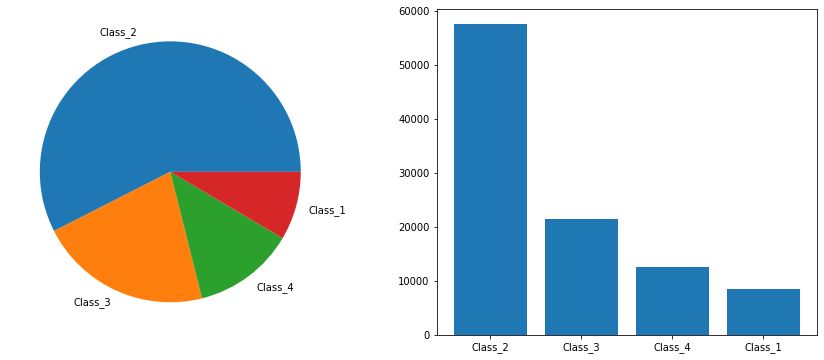

In [56]:
# Target Value Count Distribution:

target_mass = train_data['target'].value_counts()
values = target_mass.values.tolist()
indexes = target_mass.index.tolist()

ax,fig = plt.subplots(1,2,figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(values , labels = indexes)
plt.subplot(1,2,2)
plt.bar(indexes,values)
plt.show()

We have seen that the features are not distributed well. 

Now we should check each features' distributions as we ca find any feature which has no significant feature value and  can be omitted in this case .

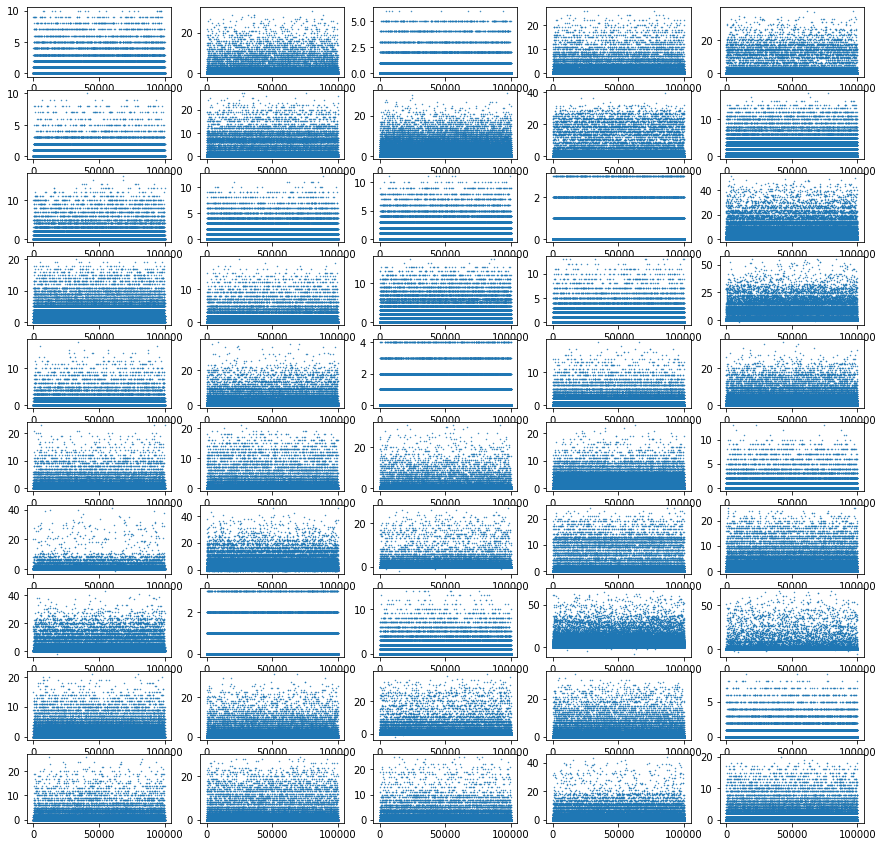

In [57]:
ax,fig = plt.subplots(10,5,figsize=(15,15))
for i in range(50):
    plt.subplot(10,5,i+1)
    arr =train_data['feature_'+str(i)].tolist()
    plt.scatter(range(len(train_data)),arr,s = 0.2)
plt.show()

So, we've found that every single feature has a wide range of data spread.

### Heatmap:
---
so, we must check their correlation to find any oher information.

In [58]:
def plot_diag_heatmap(data):
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.01, center=0,square=True, linewidths=.5, cbar_kws={"shrink": 1.0})

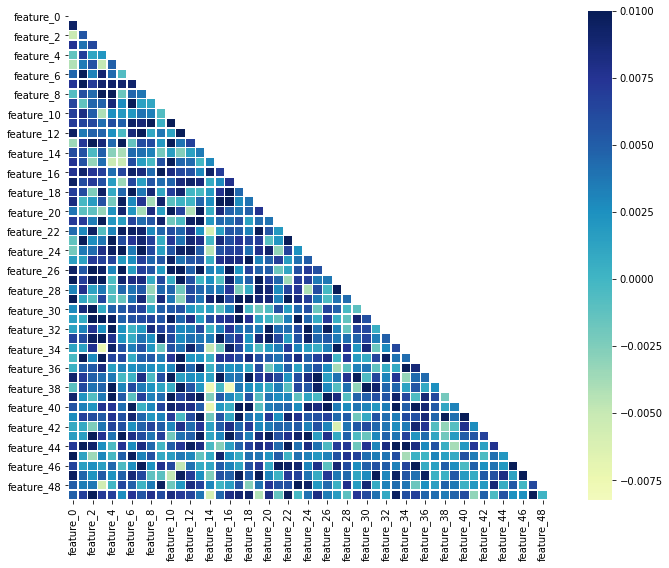

In [59]:
plot_diag_heatmap(train_data.iloc[:,1:])

No handles with labels found to put in legend.


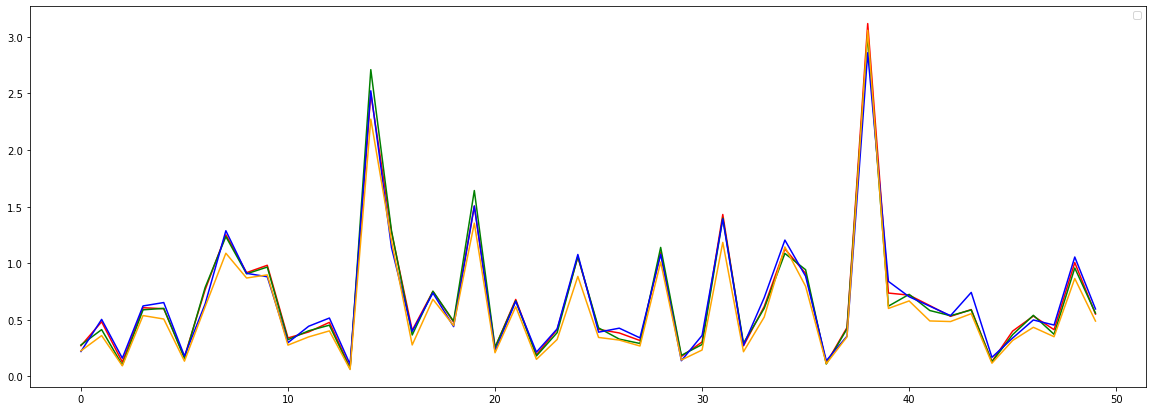

In [60]:
 color = ['red' , 'green' , 'blue' , 'orange']
x1 = []
x2 = []
x3 = []
x4 = []
for i in range(4):
    xx = train_data[train_data['target']=='Class_'+str(i+1)]
    for col in train_data.columns[1:-1]:
        if i==0:
            x1.append(np.mean(xx[col]))
        elif i==1:
            x2.append(np.mean(xx[col]))
        elif i==2:
            x3.append(np.mean(xx[col]))
        else:
            x4.append(np.mean(xx[col]))
arr = []
arr.append(x1)
arr.append(x2)
arr.append(x3)
arr.append(x4)
plt.figure(figsize=(20,7))
#ax,fig=plt.subplots(4,1,figsize=(20,20))
for i in range(4):
    #plt.subplot(4,1,i+1)
    plt.plot(arr[i],color=color[i])
plt.legend()
#plt.title()

We can see the mean values of every single target type has negligible different, so we cannot drop any single row corresponding to this target types.

### Outliers Detection :
---

 Now we should check for the outliers in this data , as we should remove those and find a better trainable data.

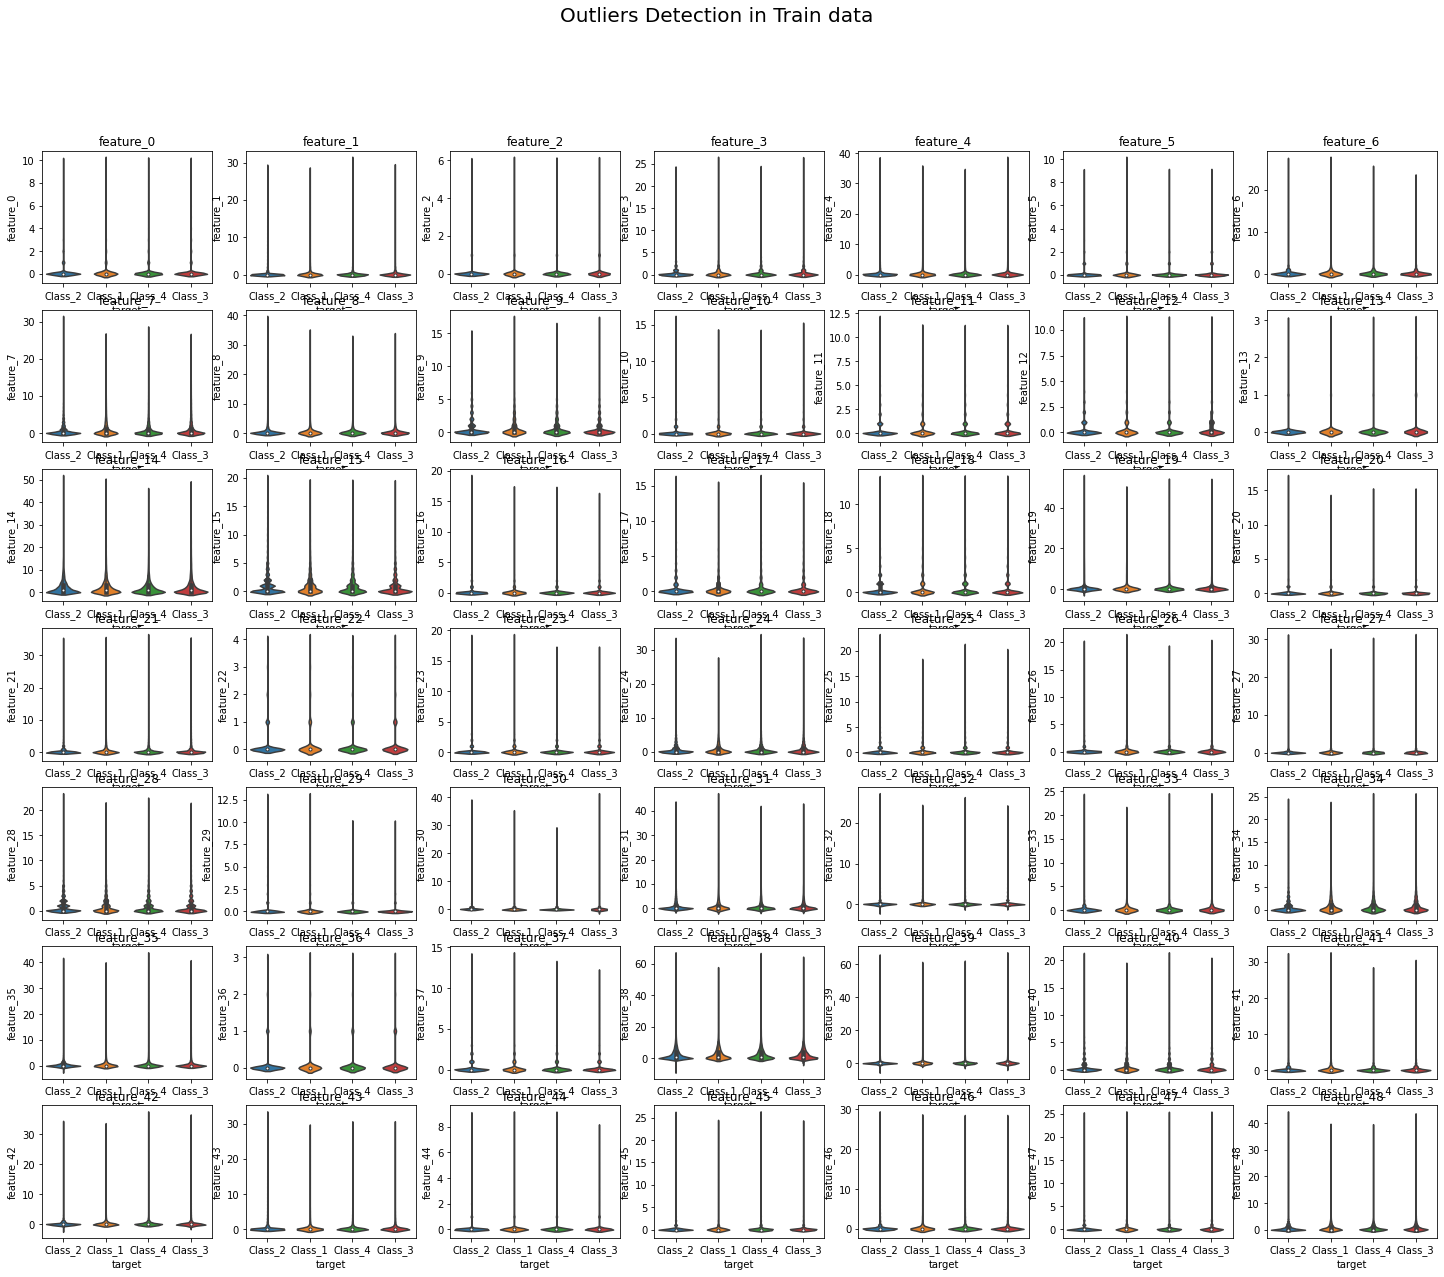

In [61]:
ax,fig = plt.subplots(7,7,figsize=(25,20))
plt.suptitle('Outliers Detection in Train data',size=20)
for i in range(7):
    for j in range(7):
        plt.subplot(7,7,i*7+j+1)
        sns.violinplot(x=train_data['target'],y=train_data.iloc[:,i*7+j+1])
        plt.title(train_data.columns[i*7+j+1])
plt.show()

### Checking for any 2D pattern :
---

As the features are too much there might be any 2D pattern that might help to get a good sense of data


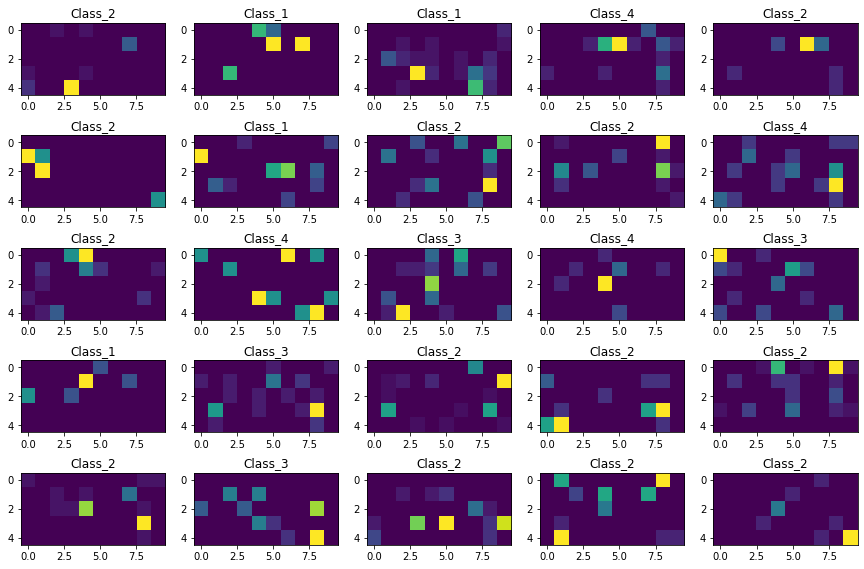

In [62]:
frame_pattern = train_data.iloc[:,1:-1].to_numpy()
frame_pattern.shape
ax,fig = plt.subplots(5,5,figsize=(15,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(frame_pattern[i].reshape(5,10)/255.0)
    plt.title(train_data['target'][i])
plt.show()


So, it looks like the data has no significant pattern. So, leaving this part.

## Preprocessing :
---
We're doing some basic data processing to present the trainable data

In [63]:
# Dropping the id columns

Train = train_data.drop('id',1)

Test = test_data.drop('id',1)

### MinMaxScaler :
---

 We are going to make every single feature's value lie in between 0 to 1 as their equivalence.

In [64]:
# Minmaxscaling :

def minmaxscaler(data, fin):
    
    for feature in fin.columns:
        if data[feature].dtype != 'object':
            min_value = min(data[feature])
            max_value = max(data[feature])
            data[feature] = (data[feature]-min_value) / (max_value-min_value)
            fin[feature] = (fin[feature]-min_value) / (max_value-min_value)
    
    return data,fin

In [65]:
Train,Test = minmaxscaler(Train,Test)

In [66]:
Train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0.0,0.0,0.166667,0.0,0.026316,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.3750,0.000000,0.035088,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.047619,0.021277,0.068966,0.000000,0.04,0.044444,0.000000,0.0,0.108108,0.070423,0.142857,0.0,0.051282,0.636364,0.0,0.0,0.0,0.00,0.000000,0.0,Class_2
1,0.0,0.0,0.000000,0.0,0.052632,0.1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.15,0.000000,0.1875,0.000000,0.035088,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.023810,0.021277,0.137931,0.000000,0.00,0.044444,0.000000,0.0,0.108108,0.070423,0.000000,0.0,0.051282,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,Class_1
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.117647,0.0,0.0,0.090909,0.000000,0.019608,0.00,0.000000,0.0000,0.000000,0.052632,0.0,0.138889,0.5,0.052632,0.029412,0.0,0.047619,0.0,0.086957,0.0,0.023810,0.021277,0.068966,0.791667,0.08,0.044444,0.333333,0.5,0.148649,0.070423,0.000000,0.0,0.076923,0.000000,0.0,0.0,0.0,0.52,0.045455,0.0,Class_1
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.096774,0.0,0.000000,0.0,0.0,0.000000,0.333333,0.137255,0.55,0.052632,0.0000,0.230769,0.052632,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.043478,0.0,0.047619,0.021277,0.068966,0.000000,0.04,0.044444,0.000000,0.0,0.162162,0.070423,0.000000,0.0,0.051282,0.000000,0.0,0.0,0.0,0.00,0.022727,0.0,Class_4
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.039216,0.00,0.473684,0.1875,0.000000,0.035088,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.023810,0.042553,0.068966,0.000000,0.00,0.044444,0.000000,0.0,0.121622,0.070423,0.000000,0.0,0.051282,0.000000,0.0,0.0,0.0,0.00,0.022727,0.0,Class_2


### Drop Low variation data :
---
 The features with low variation are no good data for training so we ust drop those features .

In [67]:
from scipy.stats import variation as var

In [68]:
for col in Test.columns[:-1]:
    print(col,' : ',var(Train[col]))

feature_0  :  3.6032593515461495
feature_1  :  4.581330086597531
feature_2  :  4.55253597011978
feature_3  :  3.1234424085497223
feature_4  :  4.6443089478816235
feature_5  :  3.738007365865085
feature_6  :  3.203670711705347
feature_7  :  2.1911263579666467
feature_8  :  3.7806394661261167
feature_9  :  2.025446096511011
feature_10  :  3.5742230291358608
feature_11  :  2.505047287345409
feature_12  :  2.445929148096396
feature_13  :  4.745650553666813
feature_14  :  1.7922586176623758
feature_15  :  1.7391688422277782
feature_16  :  3.5198455957306787
feature_17  :  2.4586202904579575
feature_18  :  2.3267638726232027
feature_19  :  1.3323194144605737
feature_20  :  3.8184194523632353
feature_21  :  3.297267715702122
feature_22  :  2.998003586332881
feature_23  :  3.1331559880526534
feature_24  :  2.441903948220273
feature_25  :  3.234374394685279
feature_26  :  4.21985316348124
feature_27  :  5.294944869664843
feature_28  :  1.6993833805681766
feature_29  :  4.360720224226325
feature

In [69]:
# dropping the features with low variance 
def drop_low_var_values(data,threshold):
    labels = []
    for col in data.columns:
        if data[col].dtype != 'object':
            if var(data[col]) >= threshold:
                labels.append(col)
        else:
            labels.append(col)
    new_data = data[labels]
    print(data.shape[1],' features ------> ',new_data.shape[1],' features .')
    return new_data

In [70]:
Train_data = drop_low_var_values(Train,1.3)
Test_data = Test[Train_data.columns[:-1]]

51  features ------>  45  features .


### Preparing Train and validation :
---
We're going to split prepare the valiation as 20 % of train data.
 

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
def split_data(test_size,data):
    data = data.sample(frac=1)
    x_train = data.drop('target',1)
    y_1 = data['target']
    x_train = x_train.to_numpy()
    y_1 = y_1.to_numpy()
    X_train , X_val , y_1 , y_2 = train_test_split( x_train , y_1 ,
                                                         test_size = test_size ,
                                                        random_state =1 ,
                                                        stratify = y_1)
    y_train = []
    y_val = []
    for value in y_1:
        y_train.append(int(value[-1])-1)
    for value in y_2:
        y_val.append(int(value[-1])-1)
    return X_train , X_val , np.array(y_train) , np.array(y_val)

In [73]:
X_train , X_val , y_train , y_val = split_data(0.2,Train_data)

In [74]:
X_train.shape , X_val.shape , y_train.shape , y_val.shape , Test_data.shape

((80000, 44), (20000, 44), (80000,), (20000,), (50000, 44))

## Model generation :
---

 Now we are goinfg to build our ANN model which will be used to predict on the test data.

In [75]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import BatchNormalization,Dense,Dropout

In [76]:
 # ANN Model
 
 def ann_model(input_size , num_classes):
        keras.backend.clear_session()
        
        
        model = Sequential()
        model.add(Dense(32 , activation = 'relu' , input_shape = input_size))
        model.add(Dense(64 , activation = 'relu' ))
        model.add(Dense(64 , activation = 'relu' ))
        model.add(Dropout(0.2))
        model.add(BatchNormalization())
        
        model.add(Dense(64 , activation = 'relu' ))
        model.add(Dense(64 , activation = 'relu' ))
        model.add(Dense(128 , activation = 'relu' ))
        model.add(Dropout(0.2))
        #model.add(BatchNormalization())
        
        model.add(Dense(128 , activation = 'relu'))
        model.add(Dense(num_classes , activation = 'softmax'))
        
        return model

In [77]:
num_classes = 4 
model = ann_model(X_train[0].shape,num_classes)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1440      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4

In [78]:
# Compiling the model

model.compile(optimizer = Adam(1e-4) , 
              loss = 'sparse_categorical_crossentropy' , 
              metrics = ['accuracy'])

## Model Fitting and Evaluaton :
---

Now we are going to train the model on the processed data and also check for it's peformance though the validation data.

We are going to train the model for 10 epochs.

In [79]:
epochs = 10
validation_data = (X_val,y_val)

history = model.fit(X_train,y_train , batch_size = 5 ,epochs =epochs , validation_data = validation_data ,verbose = 1)

Epoch 1/10
16000/16000 [==============================] - 42s 3ms/step - loss: 1.1379 - accuracy: 0.5685 - val_loss: 1.1192 - val_accuracy: 0.5749
Epoch 2/10
16000/16000 [==============================] - 42s 3ms/step - loss: 1.1144 - accuracy: 0.5764 - val_loss: 1.1149 - val_accuracy: 0.5749
Epoch 3/10
16000/16000 [==============================] - 42s 3ms/step - loss: 1.1107 - accuracy: 0.5763 - val_loss: 1.1158 - val_accuracy: 0.5695
Epoch 4/10
16000/16000 [==============================] - 41s 3ms/step - loss: 1.1153 - accuracy: 0.5727 - val_loss: 1.1130 - val_accuracy: 0.5749
Epoch 5/10
16000/16000 [==============================] - 41s 3ms/step - loss: 1.1092 - accuracy: 0.5760 - val_loss: 1.1148 - val_accuracy: 0.5737
Epoch 6/10
16000/16000 [==============================] - 41s 3ms/step - loss: 1.1067 - accuracy: 0.5767 - val_loss: 1.1132 - val_accuracy: 0.5706
Epoch 7/10
16000/16000 [==============================] - 41s 3ms/step - loss: 1.1092 - accuracy: 0.5751 - val_loss: 1

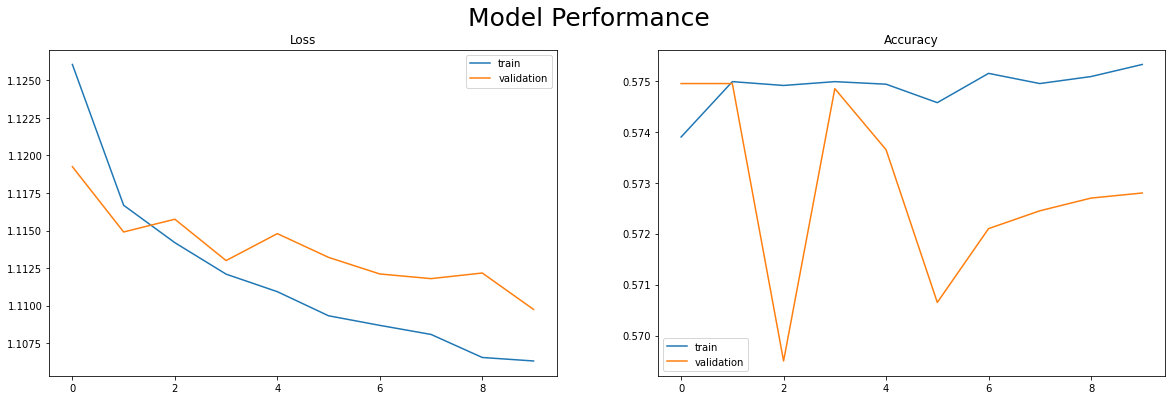

In [80]:
# Model Evaluation

ax,fig = plt.subplots(1,2, figsize=(20,6))
plt.suptitle('Model Performance',size = 25)
plt.subplot(1,2,1)
plt.plot(history.history['loss'] , label = 'train')
plt.plot(history.history['val_loss'] , label = 'validation')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'] , label = 'train')
plt.plot(history.history['val_accuracy'] , label = 'validation')
plt.legend()
plt.title('Accuracy')



plt.show()

Now we have checked that the model isn't too much overfitted for this job and can move forward to prepare the final output file.

## Submission Generation :
---

Now we are going to predict on the test data and create the final submission file and then we'll submit that.

In [81]:
labels = ['Class_1' , 'Class_2' , 'Class_3' , 'Class_4']
ts_id = test_data['id']

# function to prepare final submission 

def final_data(model,test,labels):
    pred = model.predict(test)
    pred = pd.DataFrame(pred,columns = labels)
    pred = pd.concat([ts_id,pred] , axis = 1)
    return pred

In [82]:
# processing final submission file in .csv format

fin_sub = final_data(model,Test_data,labels)
fin_sub.to_csv('ann.csv',index=False)

Hurrah !!!!

We've completed this project . 

You can find my other projects at [sagnik1511](https://kaggle.com/sagnik1511) and in [Github](https://github.com/sagnik1511).

 # Thank You for visiting  :)

 ![](https://st3.depositphotos.com/1006899/12553/i/600/depositphotos_125537970-stock-photo-end-word-hanging-on-ropes.jpg)